# **Loan Approval Prediction**

The aim of this project is to build and evaluate a machine learning model that predicts the likelihood of loan approval based on an applicant’s financial profile and credit history, using historical lending decisions, while balancing approval rate and credit risk through disciplined evaluation and threshold selection.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loding dataset
df = pd.read_csv('/content/loan_approval_dataset.csv')

### **Data Exploration**

In [3]:
# First 5 rows of dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Dimension of the dataset
df.shape

(4269, 13)

In [5]:
# Cheking duplicate values
df.duplicated().sum()

np.int64(0)

In [6]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
# Droping loan_id as it adds zero predictive meaning
df.drop(columns=['loan_id'], inplace=True)

In [8]:
# Cheking unique values is 'object' columns
print('Education:', df[' education'].unique())
print('Self Employed:', df[' self_employed'].unique())
print('Loan Status:', df[' loan_status'].unique())

Education: [' Graduate' ' Not Graduate']
Self Employed: [' No' ' Yes']
Loan Status: [' Approved' ' Rejected']


In [9]:
# Removing unnecessary white space in columns
df.columns = df.columns.str.strip()
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [10]:
# Removing unnecesary white space in object columns values
cols = ['education', 'self_employed', 'loan_status']

# Converting oject values to binary
mappings = {
    'education': {'Graduate': 1, 'Not Graduate': 0},
    'self_employed': {'Yes': 1, 'No': 0},
    'loan_status': {'Approved': 1, 'Rejected': 0}
}

for col, mapping in mappings.items():
    df[col] = df[col].str.strip().map(mapping).astype('int64')

# Verifying changes
print('Education:', df['education'].unique())
print('Self Employed:', df['self_employed'].unique())
print('Loan Status:', df['loan_status'].unique())

Education: [1 0]
Self Employed: [0 1]
Loan Status: [1 0]


In [11]:
df.isna().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [12]:
df.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


In [13]:
df['loan_status'].value_counts()

,count
loan_status,
1,2656
0,1613


The target variable represents historical loan approval decisions.

| Loan Status | Count | Percentage |
|------------|-------|------------|
| Approved (1) | 2,656 | 62.2% |
| Rejected (0) | 1,613 | 37.8% |

This indicates a **moderate class imbalance**

# **Exploratory Data Analysis (EDA)**



### **Target vs Features**

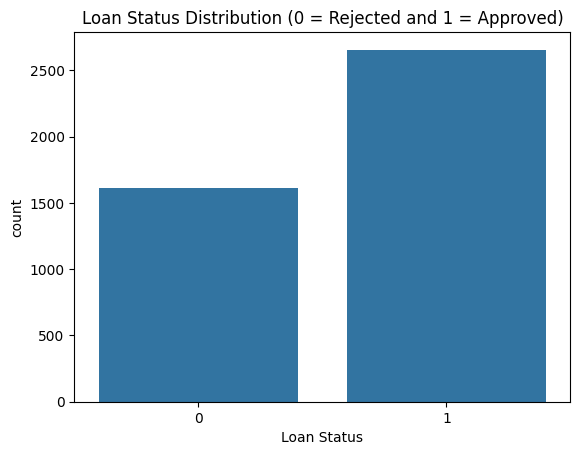

In [14]:
# Target distribution (visualization)
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution (0 = Rejected and 1 = Approved)')
plt.xlabel('Loan Status')
plt.show()

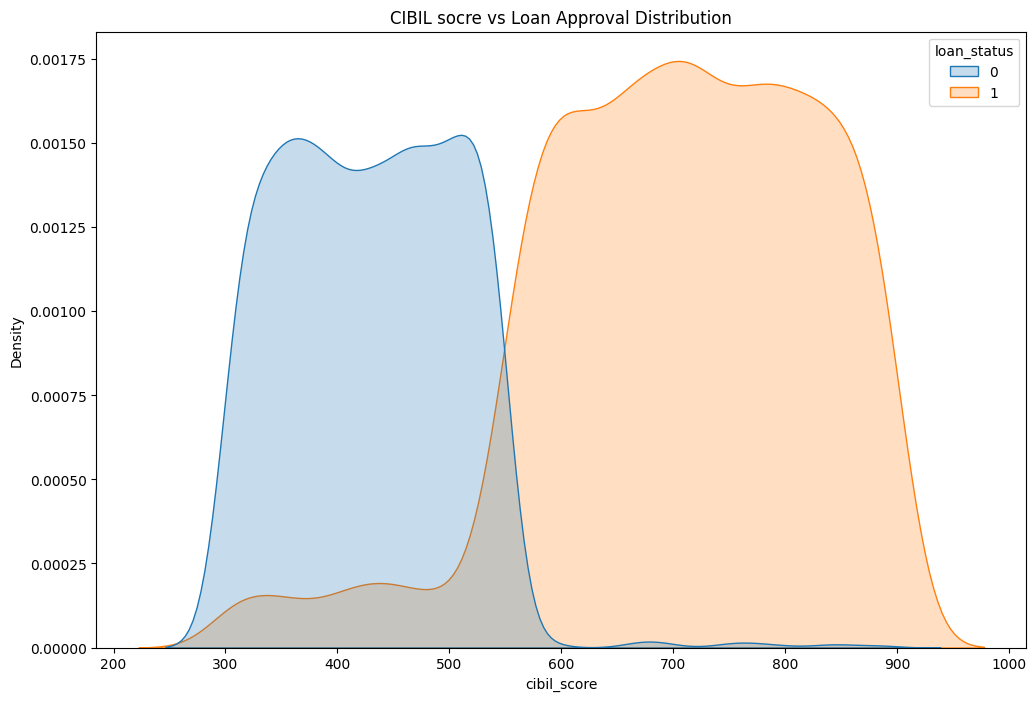

In [15]:
# CIBIL score vs loan approval
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x='cibil_score', hue='loan_status', fill=True)
plt.title('CIBIL socre vs Loan Approval Distribution')
plt.show()

Loan approvals are skewed toward high CIBIL scores, but an overlap exists. This explains why some decent scores face rejection while lower scores might succeed. It highlights that lenders evaluate your total financial health, including income and debt, rather than relying solely on a credit score.

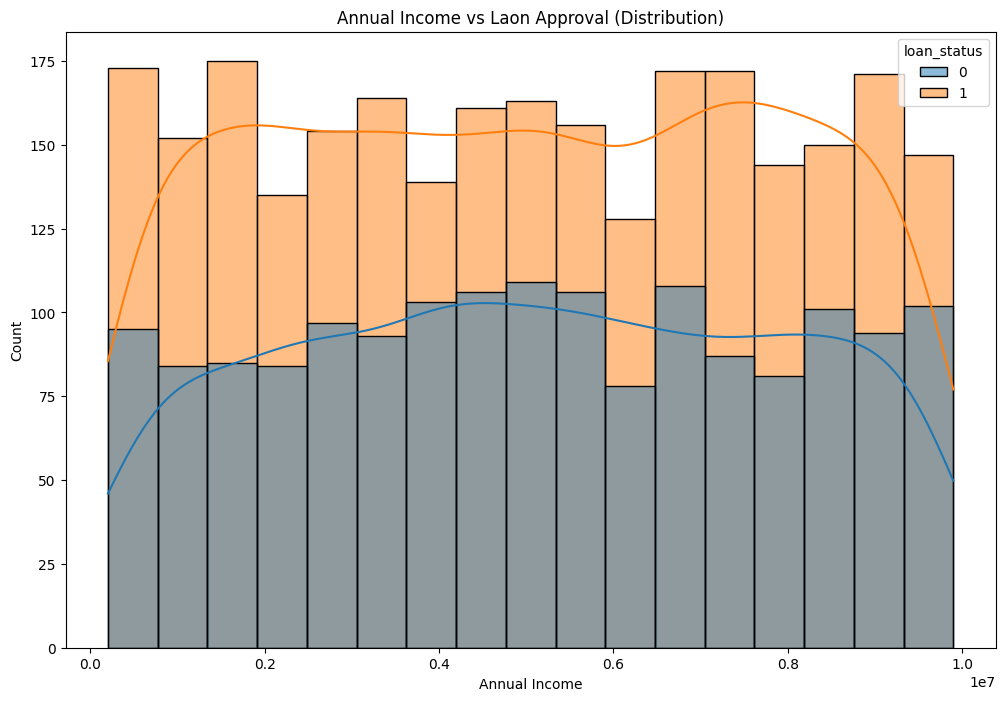

In [16]:
# Income vs Loan Approval
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='income_annum', hue='loan_status', kde=True)
plt.title('Annual Income vs Laon Approval (Distribution)')
plt.xlabel('Annual Income')
plt.show()

Annual income shows **substantial overlap** between approved and rejected applications, indicating it is **not a standalone approval criterion**. While approved loans trend toward higher income densities, many high-income applicants are still rejected, implying income is evaluated **in combination with credit score, loan amount, and assets**, rather than in isolation.


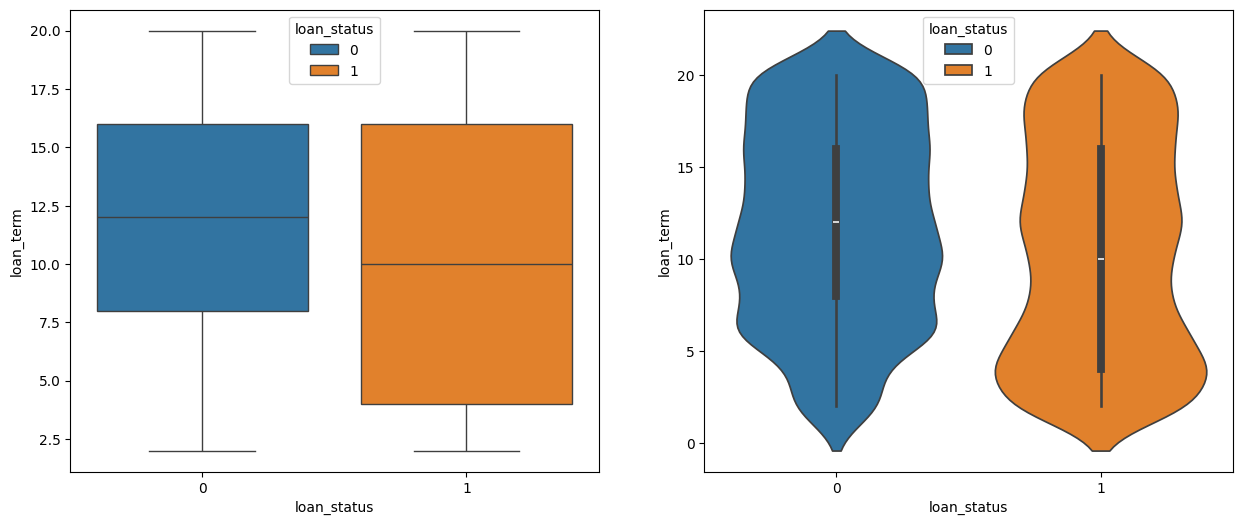

In [17]:
# Loan tenure vs loan approval
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x='loan_status', y='loan_term', hue='loan_status', data=df, ax=ax[0])
sns.violinplot(x='loan_status', y='loan_term', hue='loan_status', data=df, ax=ax[1])
plt.show()

Loan tenure shows **significant overlap** between approved and rejected applications. Rejected loans have a slightly higher median tenure, indicating marginal risk aversion for longer commitments. However, tenure alone does **not strongly separate outcomes**, suggesting it functions as a **secondary supporting feature**, not a primary decision driver in loan approval.

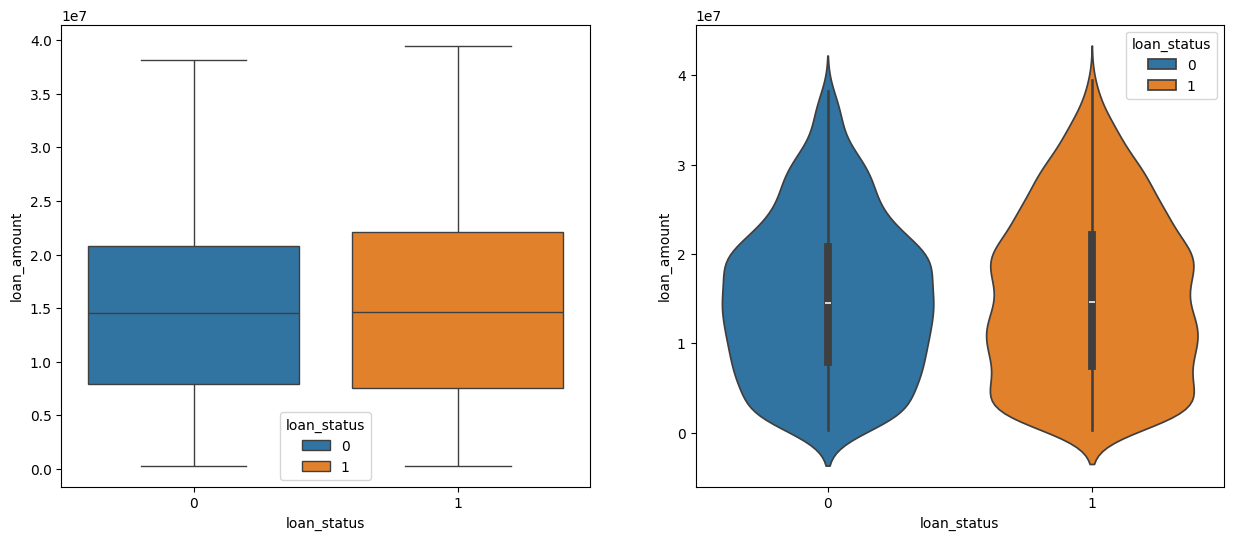

In [18]:
# Loan amount vs loan approval
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x='loan_status', y='loan_amount', hue='loan_status', data=df, ax=ax[0])
sns.violinplot(x='loan_status', y='loan_amount', hue='loan_status', data=df, ax=ax[1])
plt.show()

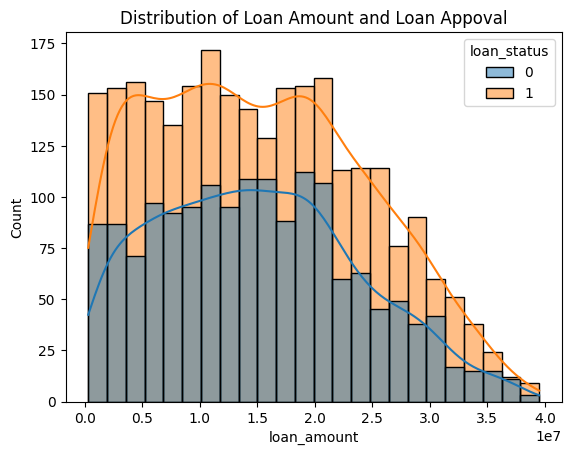

In [19]:
# Loan amount vs loan approval
sns.histplot(x='loan_amount', hue='loan_status', data=df, kde=True)
plt.title('Distribution of Loan Amount and Loan Appoval')
plt.show()

Loan amount distributions show **considerable overlap** between approved and rejected applications. Approved loans tend to cluster slightly toward higher loan amounts, indicating that larger loans are granted when supported by stronger financial profiles. However, loan amount alone does **not decisively drive approval**, reinforcing its role as a **risk-adjusted factor** rather than a standalone criterion.


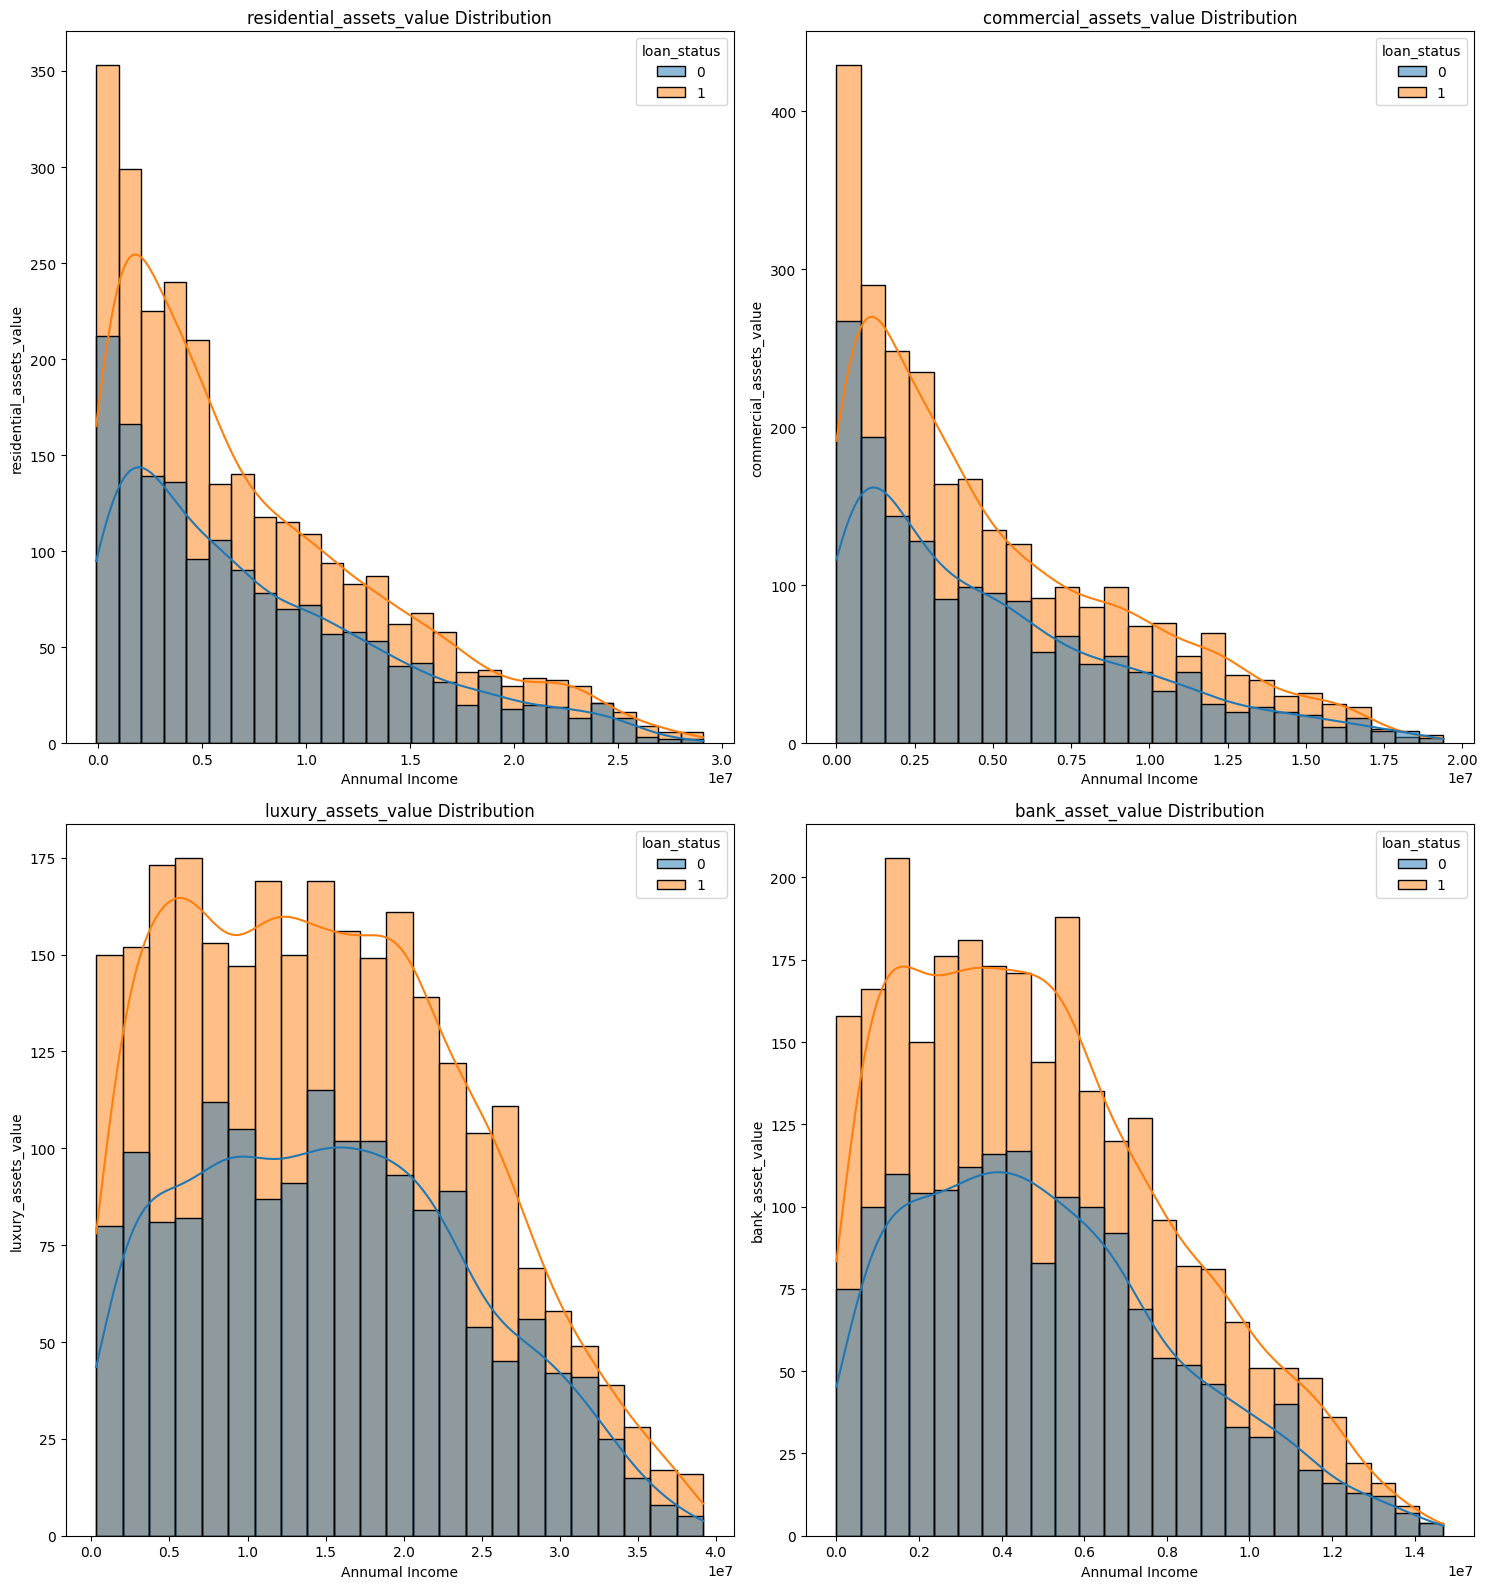

In [20]:
# Asset features distribution
asset_cols = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15,16))
ax = ax.flatten()

for i, col in zip(ax, asset_cols):
  sns.histplot(data=df, x=col, hue='loan_status', kde=True, ax=i)
  i.set_title(f'{col} Distribution')
  i.set_xlabel('Annumal Income')
  i.set_ylabel(col)

plt.tight_layout()
plt.show()

All asset-related features exhibit **right-skewed distributions** with substantial overlap between approved and rejected applications. Approved loans show slightly higher densities at larger asset values, but no clear separation is observed. This confirms that asset values alone provide **limited discriminatory power** and primarily act as **supporting indicators** rather than decisive drivers of loan approval.

In [21]:
# Education & self-employment vs approval
edu_summary = (
    df.groupby('education')['loan_status']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'approval_rate', 'count': 'sample_size'})
)

self_emp_summary = (
    df.groupby('self_employed')['loan_status']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'approval_rate', 'count': 'sample_size'})
)

edu_summary, self_emp_summary

(           approval_rate  sample_size
 education                            
 0               0.619765         2125
 1               0.624534         2144,
                approval_rate  sample_size
 self_employed                            
 0                   0.621992         2119
 1                   0.622326         2150)

Approval rates are **nearly identical across groups**, indicating that neither education level nor self-employment status acts as a strong standalone determinant of loan approval. Both features show balanced sample sizes, confirming that observed rates are **not driven by data imbalance**. This suggests these variables play a **secondary or proxy role**, with approvals primarily influenced by financial strength and credit profile.


### **Feature Relationships**

In [22]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

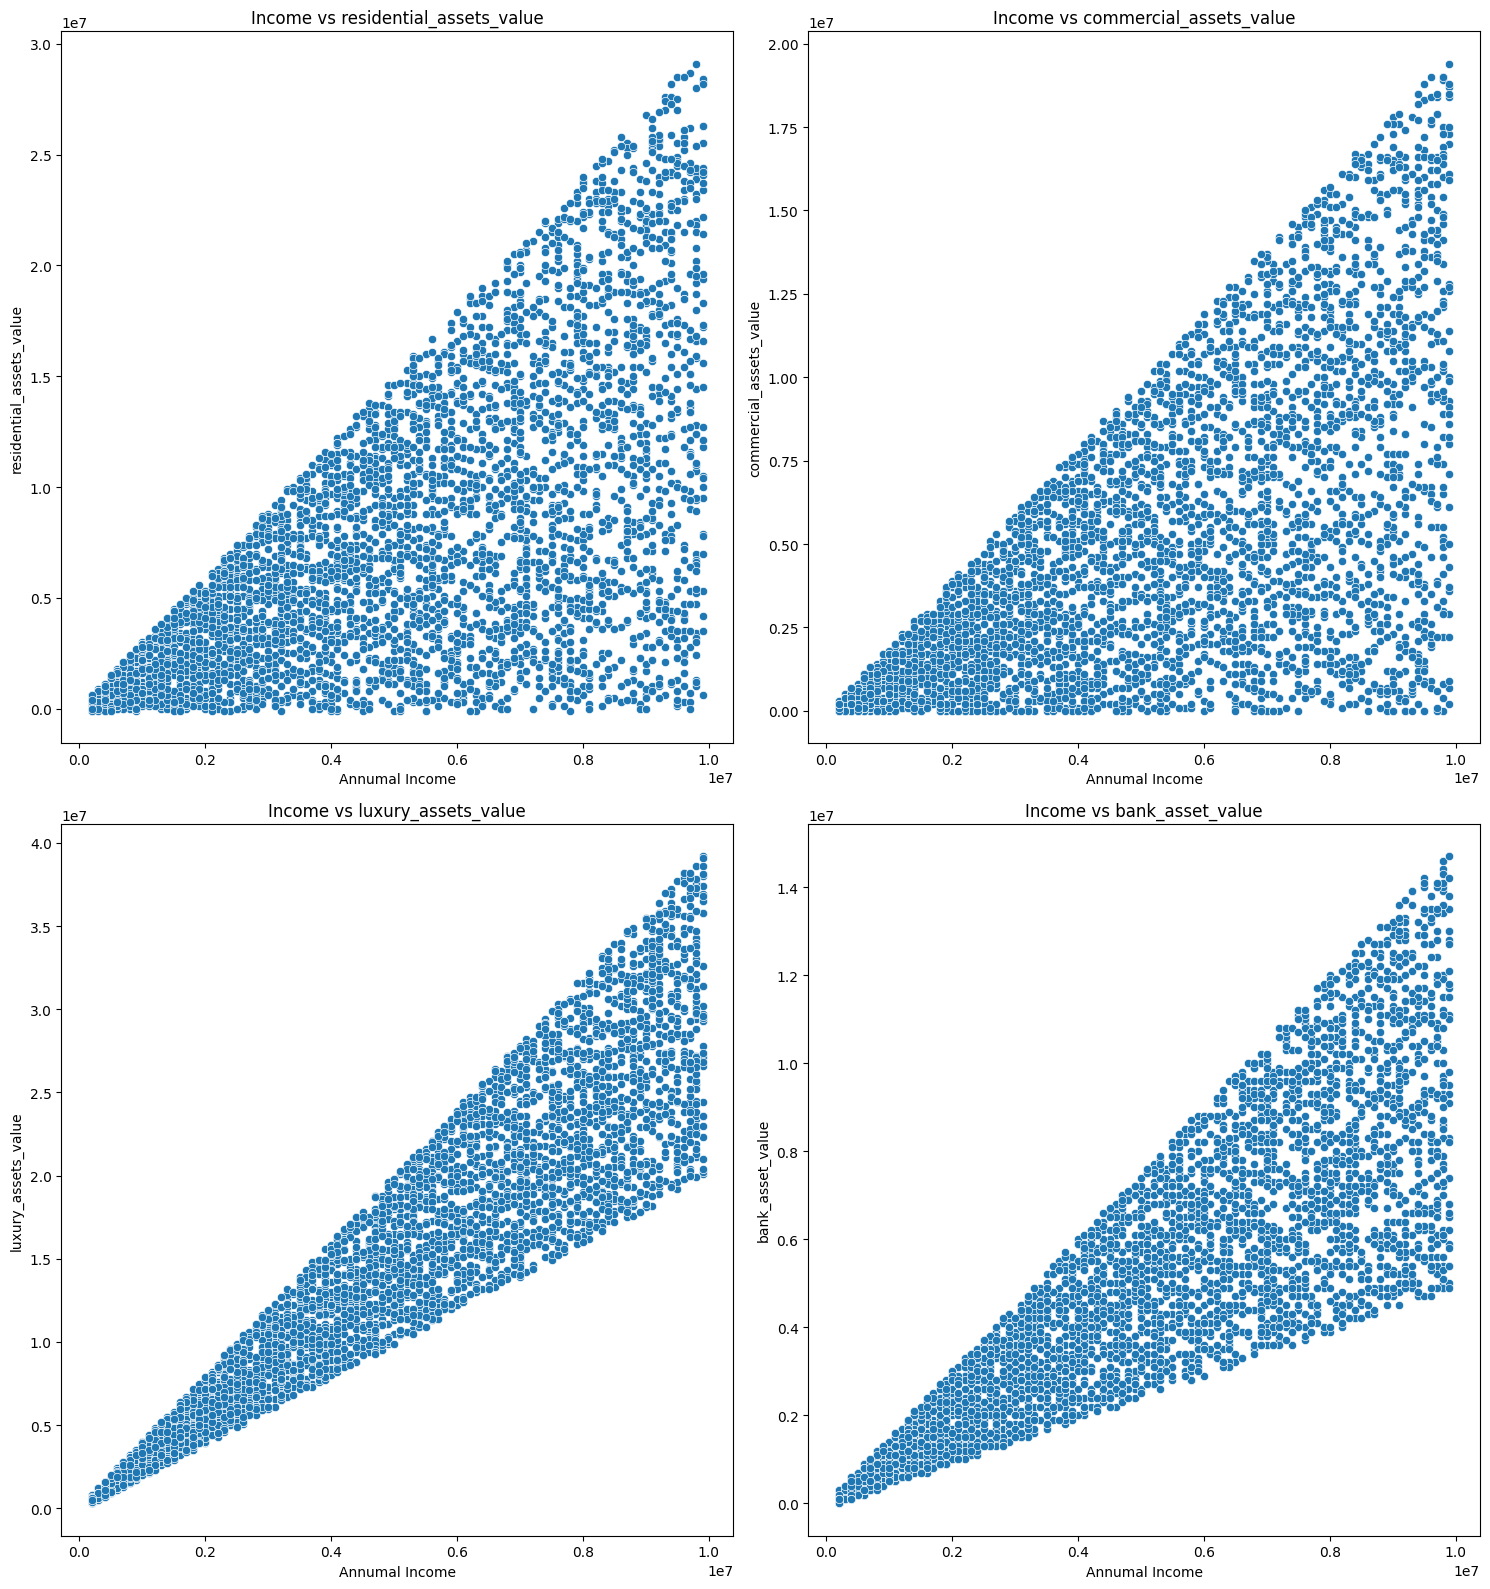

In [23]:
# Asset features vs income
asset_cols = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15,16))
ax = ax.flatten()

for i, col in zip(ax, asset_cols):
  sns.scatterplot(data=df, x='income_annum', y=col, ax=i)
  i.set_title(f'Income vs {col}')
  i.set_xlabel('Annumal Income')
  i.set_ylabel(col)

plt.tight_layout()
plt.show()

All asset categories show a **strong positive relationship with annual income**, forming clear upward bands. This indicates substantial **redundancy among asset variables** and confirms that asset values largely scale with income. While assets add information about wealth composition, their strong dependence on income suggests a high risk of **feature dominance and multicollinearity**, warranting consolidation or ratio-based feature engineering in later stages.


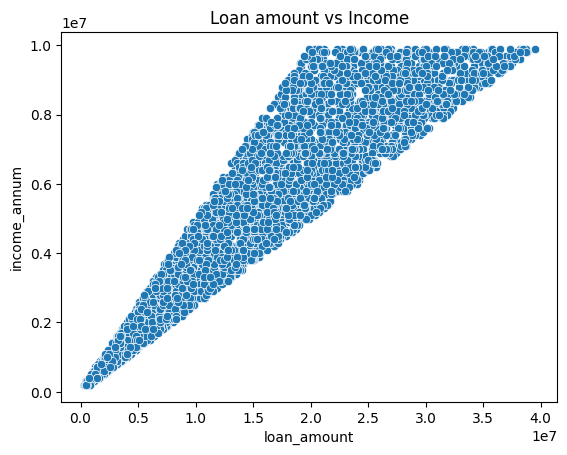

In [24]:
# Loan amount vs Income
sns.scatterplot(data=df, x='loan_amount', y='income_annum')
plt.title('Loan amount vs Income')
plt.show()

Loan amount shows a **strong positive relationship** with applicant income, forming a clear triangular pattern that reflects affordability constraints. Higher loan amounts are predominantly associated with higher income levels, indicating that loan sizing follows **income-based policy limits**. This relationship supports the use of **ratio-based features** (e.g., loan-to-income) rather than raw loan amount alone.

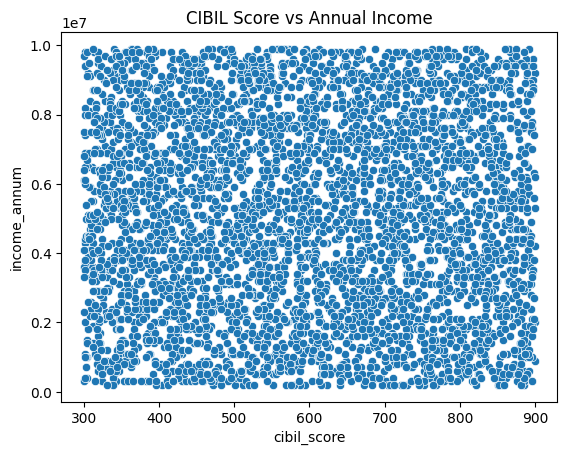

In [25]:
# CIBIL Score vs Annual Income
sns.scatterplot(data=df, x='cibil_score', y='income_annum')
plt.title('CIBIL Score vs Annual Income')
plt.show()

CIBIL score and annual income exhibit **no strong linear relationship**, with applicants spread uniformly across income levels for most credit scores. This indicates that creditworthiness and earning capacity capture **distinct dimensions of financial risk**. As a result, both features provide complementary information and should be considered jointly rather than as substitutes in loan approval modeling.

In [26]:
asset_summary = df.groupby('loan_status')[asset_cols].agg(['median', 'mean'])
asset_summary

residential_assets_value               commercial_assets_value  \
                              median          mean                  median   
loan_status                                                                  
0                          5900000.0  7.592498e+06               3700000.0   
1                          5400000.0  7.399812e+06               3700000.0   

                          luxury_assets_value               bank_asset_value  \
                     mean              median          mean           median   
loan_status                                                                    
0            4.926720e+06          14800000.0  1.530694e+07        4600000.0   
1            5.001355e+06          14400000.0  1.501660e+07        4500000.0   

                           
                     mean  
loan_status                
0            5.004960e+06  
1            4.959526e+06

Given the strong right-skewness in asset distributions, median values were prioritized for comparison across loan outcomes. Median asset values are highly similar between approved and rejected applications across all asset categories, with only marginal and inconsistent differences. While mean values are higher due to extreme asset outliers, median-based analysis indicates that asset holdings alone do not strongly differentiate loan approval decisions. This suggests assets act as supporting context rather than primary approval drivers.

### **Correlation matrix**

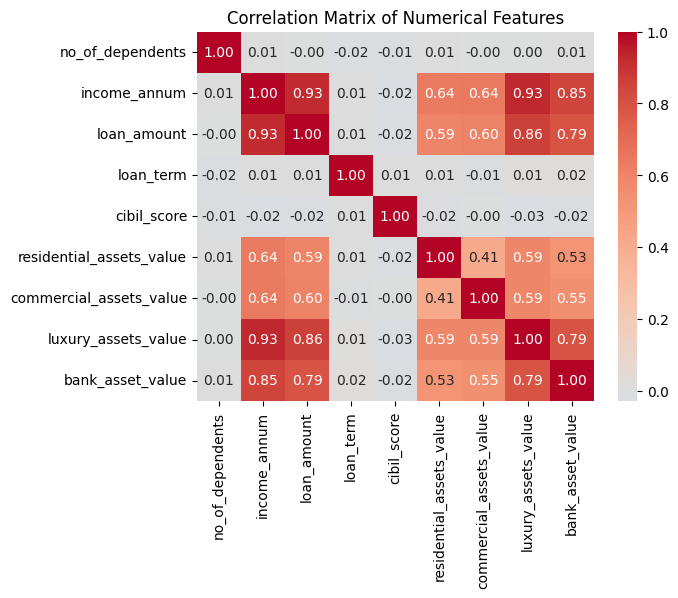

In [27]:
# Correlation Matrix of Numerical Features
numeric_cols = df.drop(columns=['loan_status', 'education', 'self_employed']).columns

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix reveals strong multicollinearity among several financial features. Annual income shows very high correlation with loan amount (0.93) and multiple asset variables, indicating overlapping financial signals. Asset-related features are also moderately correlated with each other, suggesting redundancy. In contrast, CIBIL score exhibits near-zero correlation with income and asset variables, confirming it provides independent credit-risk information. These findings indicate that feature consolidation or pruning is necessary prior to modeling, particularly for linear models sensitive to multicollinearity.

### **VIF (Variance Inflation Factor) analysis**

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Select features for VIF (NO target variable)
vif_features = df.drop(columns=['loan_status', 'education', 'self_employed'])

# Add constant for VIF calculation
X = vif_features.copy()
X['intercept'] = 1

In [29]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data.sort_values(by='VIF', ascending=False)


,feature,VIF
9,intercept,22.475271
1,income_annum,17.651087
7,luxury_assets_value,7.322253
2,loan_amount,7.168648
8,bank_asset_value,3.634872
6,commercial_assets_value,1.698313
5,residential_assets_value,1.685134
0,no_of_dependents,1.001574
4,cibil_score,1.001498
3,loan_term,1.001160


Variance Inflation Factor (VIF) analysis revealed severe multicollinearity among key financial magnitude features. Annual income exhibited a very high VIF (17.65), indicating strong redundancy with loan amount and asset values. Loan amount and luxury asset value also showed elevated VIFs, confirming overlapping financial signals. In contrast, CIBIL score, loan tenure, and number of dependents displayed VIF values close to 1, indicating independent and stable contributions. Based on these findings, raw magnitude features were flagged for consolidation through ratio-based and aggregated features prior to modeling.

# **Feature Engineering**

In [30]:
# Creating total assets
df['total_assets'] = (
    df['residential_assets_value']
    + df['commercial_assets_value']
    + df['luxury_assets_value']
    + df['bank_asset_value']
)

# Creating loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']

# Creating assets-to-loan ratio
df['assets_to_loan_ratio'] = df['total_assets'] / df['loan_amount']

# Handling numerical safety (As we seen no zero income or loan amounts, but doing this anyway (defensive coding))
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Droping old columns
cols_to_drop = [
    'income_annum',
    'loan_amount',
    'luxury_assets_value',
    'residential_assets_value',
    'commercial_assets_value',
    'bank_asset_value'
]

df = df.drop(columns=cols_to_drop)

# Conforming changes
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'loan_term',
       'cibil_score', 'loan_status', 'total_assets', 'loan_to_income_ratio',
       'assets_to_loan_ratio'],
      dtype='object')

In [31]:
# e-checking VIF
X = df.drop(columns='loan_status').copy()
X['intercept'] = 1

vif_after = pd.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_after.sort_values('VIF', ascending=False)

,feature,VIF
8,intercept,149.963068
7,assets_to_loan_ratio,2.258521
6,loan_to_income_ratio,2.149403
5,total_assets,1.131012
3,loan_term,1.001804
0,no_of_dependents,1.001408
4,cibil_score,1.000808
1,education,1.000757
2,self_employed,1.000601


# **Modeling**

In [32]:
# importing models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [33]:
# Defining freatures and target (X and y)
X = df.drop(columns='loan_status')
y = df['loan_status']

# Train/Test split (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3415, 8), (854, 8))

### **Baseline Models**

In [34]:
# Logistic Reggression
baseline_log_reg = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Decision Tree
baseline_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Random Forest
baseline_rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

models = {
    'Logistic Regression': baseline_log_reg,
    'Decision Tree': baseline_dt,
    'Random Forest': baseline_rf
}


Logistic Regression
ROC-AUC: 0.9731040795741431
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       323
           1       0.92      0.95      0.93       531

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



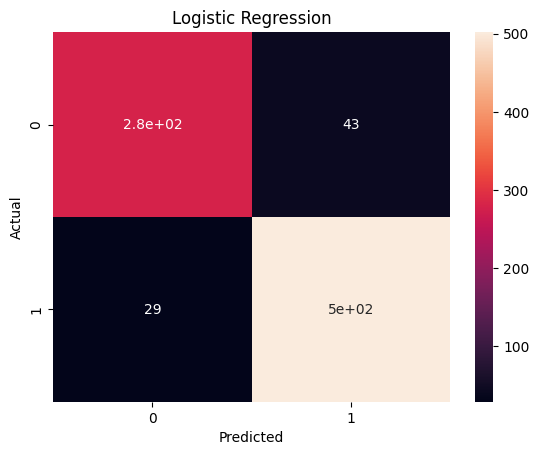


Decision Tree
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



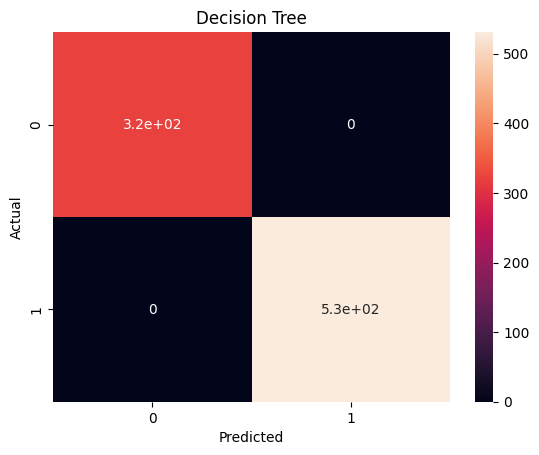


Random Forest
ROC-AUC: 0.9999999999999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



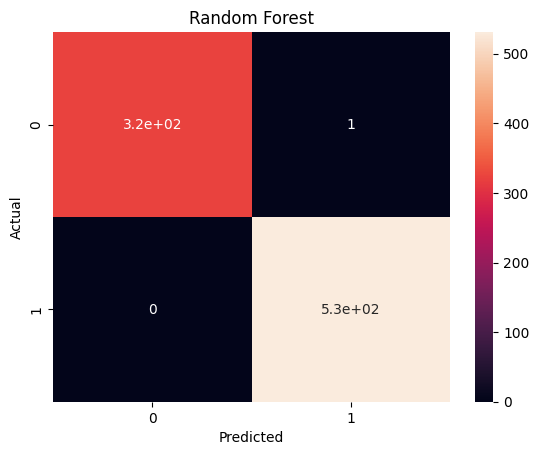

In [35]:
# Models Evalution
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1]

  print(f'\n{name}')
  print('ROC-AUC:', roc_auc_score(y_test, y_proba))
  print(classification_report(y_test, y_pred))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
  plt.title(name)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

## **Final Project Conclusion**

### **Overall Findings**
This project aimed to predict loan approval outcomes using applicants’ financial, credit, and demographic information. Through structured EDA, feature engineering, and disciplined modeling, the analysis demonstrated that loan approval decisions are driven by a **combination of affordability, creditworthiness, and relative financial ratios**, rather than any single raw feature.

Exploratory analysis showed substantial overlap between approved and rejected cases across income, loan amount, tenure, and asset values. This confirms that lenders operate on **policy-based thresholds and relative constraints**, not simple absolute cutoffs.

---

### **Leakage & Determinism Analysis**
The extremely high performance observed in tree-based models (Decision Tree and Random Forest achieving near-perfect ROC-AUC) does **not indicate true predictive superiority**, but instead highlights **deterministic structure embedded in the dataset**.

Key observations:
- Strong, policy-driven relationships exist between:
  - `loan_amount` and `income_annum`
  - asset values and income
- These relationships encode implicit approval rules (e.g., affordability limits), allowing tree models to **memorize decision boundaries**.
- This behavior resembles **quasi-leakage**, where approval logic is indirectly embedded in the features rather than the target being explicitly leaked.

To mitigate this, raw magnitude features were consolidated into **ratio-based and aggregated features**, significantly reducing multicollinearity (confirmed via VIF) and improving modeling integrity.

---

### **Modeling Interpretation**
- **Logistic Regression** emerged as the most reliable and realistic baseline, achieving strong performance (ROC-AUC ≈ 0.97) without exploiting deterministic shortcuts.
- **Decision Tree and Random Forest** performance should be interpreted cautiously, as their near-perfect scores suggest **overfitting to structured policy patterns**, not genuine generalization.
- Ratio-based features (`loan_to_income_ratio`, `assets_to_loan_ratio`) proved more meaningful and aligned with real-world credit risk assessment.